In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib
# Colab 런타임 다시 시작

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import quote
import requests
import re          #정규표현식을 위해
from tqdm.notebook import tqdm

In [ ]:
base_url='https://www.hanbit.co.kr/'
sub_url='store/books/new_book_list.html'
url = base_url+sub_url
res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')

In [ ]:
lis = soup.select('.sub_book_list')
len(lis)

20

In [ ]:
li = lis[0]
href=li.find('a')['href']
href

'/store/books/look.php?p_code=B1207366943'

In [ ]:
res=requests.get(base_url+href)
book_soup=BeautifulSoup(res.text,'html.parser')

In [ ]:
tags=book_soup.select('.tag_area > a')
len(tags)

13

In [ ]:
tags

[<a href="/search/search_list.html?ptype=B&amp;keyword=소프트웨어 엔지니어링">소프트웨어 엔지니어링</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=소프트웨어 공학">소프트웨어 공학</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=코드 리뷰">코드 리뷰</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=코드베이스">코드베이스</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=프로그래밍">프로그래밍</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=문서자료">문서자료</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=단위 테스트">단위 테스트</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=구글러">구글러</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=software">software</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=engineer">engineer</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=software engineering">software engineering</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=software engineer">software engineer</a>,
 <a href="/search/search_list.html?ptype=B&a

In [ ]:
tag_list=[]
for a in tags:
  tag_list.append(a.get_text().strip())
print(tag_list)

['소프트웨어 엔지니어링', '소프트웨어 공학', '코드 리뷰', '코드베이스', '프로그래밍', '문서자료', '단위 테스트', '구글러', 'software', 'engineer', 'software engineering', 'software engineer', 'google']


In [ ]:
tag_list = []
for page in tqdm(range(1,11)):
  url=f'{base_url}{sub_url}?page={page}'
  res=requests.get(url)
  soup=BeautifulSoup(res.text,'html.parser')
  lis=soup.select('.sub_book_list')
  for li in lis:
      book_url = li.find('a')['href']
      res = requests.get(base_url + book_url)
      book_soup = BeautifulSoup(res.text, 'html.parser')
      tags=book_soup.select('.tag_area > a')
      for a in tags:
        tag_list.append(a.get_text().strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
tag_list[:15]

['소프트웨어 엔지니어링',
 '소프트웨어 공학',
 '코드 리뷰',
 '코드베이스',
 '프로그래밍',
 '문서자료',
 '단위 테스트',
 '구글러',
 'software',
 'engineer',
 'software engineering',
 'software engineer',
 'google',
 '그래프 데이터베이스',
 '그래프 DB']

In [ ]:
len(tag_list)

2445

* 워드 클라우드 만들기

In [ ]:
tag_set=set(tag_list)
len(tag_set)

1512

In [ ]:
tag_dict={}
#tag_dict={item:tag_set.count(item) for item in tag_set}
for item in tag_set:
  tag_dict[item] = tag_list.count(item)

In [ ]:
tag_dict

In [ ]:
import pickle   #pickle 저장법
with open('hanbit_crawling.pkl','wb') as f:
  pickle.dump(tag_dict,f)

In [ ]:
# 다음에 다시 로드하는법
# with open('hanbit_crawling.pkl','rb') as f:
#   tag_dict=pickle.load(f)  

워드클라우드

In [ ]:
count=0
for key,val in tag_dict.items():
  print(key,':',val)
  count+=1
  if count > 5: 
    break

 : 1
데이터3법 : 1
애플리케이션 구축 : 1
GitHub : 1
글로벌 : 1
유아영어 : 1


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'
wc=WordCloud(background_color='white',random_state=2022,font_path='NanumBarunGothic')
wc=wc.generate_from_frequencies(tag_dict)

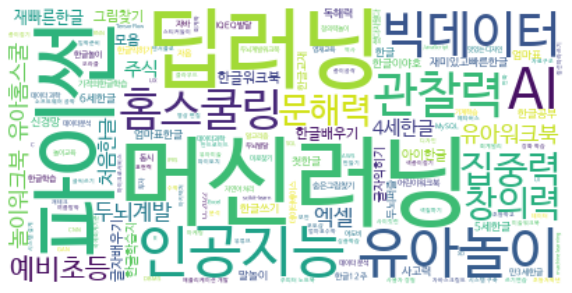

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc,interpolation='bilinear')  
plt.axis('off')
plt.show()